In [1]:
#Used for interactivity
!jupyter nbextension enable --py widgetsnbextension
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as  widgets 

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# The Iris Dataset:
This is my introduction into the Data Science and Analysis world. What I want to achieve, is to create an understanding for the standard laymen to see the patterns and distinctions between these three Iris species. I also want to create a machine learning model (Perceptron and Gradient Descent Specifically) to classify new flowers with high accuracy while using as little data as I can.

# What I want to learn and practice with this kernel:
* Learn how to explore and visualize data more deeply to gain a better understanding of the relationship of data
* Decision Boundary Drawing
* Affects of adding more features to Perceptron to see variance vs bias tradeoff.
* Learn basics of different Gradient Descent algorithms.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.special import comb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df
df = df.drop(labels = "Id", axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* We can see that the first 50 belongs to Iris-setosa, next 50 are Iris-versicolor, last 50 are Iris-virginica

# Data Exploration/Understanding

### **Sepal Length analysis**

In [4]:
sLength = df[['SepalLengthCm','Species']]
sLength

,SepalLengthCm,Species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa
...,...,...
145,6.7,Iris-virginica
146,6.3,Iris-virginica
147,6.5,Iris-virginica
148,6.2,Iris-virginica


In [5]:
sLength_bySpecies = {}
for i, id in enumerate(sLength['Species'].unique()):
    sLength_bySpecies[id] = sLength[sLength['Species'] == id]
for spec in sLength_bySpecies:
    print("Describe for " + spec + ":")
    print(sLength_bySpecies[spec].describe())

Describe for Iris-setosa:
       SepalLengthCm
count       50.00000
mean         5.00600
std          0.35249
min          4.30000
25%          4.80000
50%          5.00000
75%          5.20000
max          5.80000
Describe for Iris-versicolor:
       SepalLengthCm
count      50.000000
mean        5.936000
std         0.516171
min         4.900000
25%         5.600000
50%         5.900000
75%         6.300000
max         7.000000
Describe for Iris-virginica:
       SepalLengthCm
count       50.00000
mean         6.58800
std          0.63588
min          4.90000
25%          6.22500
50%          6.50000
75%          6.90000
max          7.90000


* We can see that in terms of the mean, std, max, and percentiles, there is a distinction in magnitude, in increasing order:
    1. Iris-setosa (Being the least)
    2. Iris-versicolor (Being the middle)
    3. Iris-virginica (Being the biggest)
* However we can see that the max sepal length for Iris-setosa is 5.8, while the min for both Iris-versicolor and Iris-virginica is 4.9, meaning that values in between 4.9 and 5.8 can belong to all 3 species/labels. So although there is a correlation with the length of the sepal, it isn't exact

### **Sepal width analysis**
Here we are just going to do the same thing for sepal width

In [6]:
sWidth = df[['SepalWidthCm','Species']]
sWidth_bySpecies = {}
for i, id in enumerate(sWidth['Species'].unique()):
    sWidth_bySpecies[id] = sWidth[sWidth['Species'] == id]
for spec in sWidth_bySpecies:
    print("Describe for " + spec + ":")
    print(sWidth_bySpecies[spec].describe())

Describe for Iris-setosa:
       SepalWidthCm
count     50.000000
mean       3.418000
std        0.381024
min        2.300000
25%        3.125000
50%        3.400000
75%        3.675000
max        4.400000
Describe for Iris-versicolor:
       SepalWidthCm
count     50.000000
mean       2.770000
std        0.313798
min        2.000000
25%        2.525000
50%        2.800000
75%        3.000000
max        3.400000
Describe for Iris-virginica:
       SepalWidthCm
count     50.000000
mean       2.974000
std        0.322497
min        2.200000
25%        2.800000
50%        3.000000
75%        3.175000
max        3.800000


* Because Iris-setosa's sepal width is 3.41 which is a big enough difference compared to the other two to say generally iris-setosa will have wider sepals than the other two. 
* But since iris-versicolor and iris-virginica's difference in mean is only 0.2, there is no definitive correlation to differentiate between these two using only the sepal width.

### **Petal length analysis**

In [7]:
pLength = df[['PetalLengthCm','Species']]
pLength_bySpecies = {}
for i, id in enumerate(pLength['Species'].unique()):
    pLength_bySpecies[id] = pLength[pLength['Species'] == id]
for spec in pLength_bySpecies:
    print("Describe for " + spec + ":")
    print(pLength_bySpecies[spec].describe())

Describe for Iris-setosa:
       PetalLengthCm
count      50.000000
mean        1.464000
std         0.173511
min         1.000000
25%         1.400000
50%         1.500000
75%         1.575000
max         1.900000
Describe for Iris-versicolor:
       PetalLengthCm
count      50.000000
mean        4.260000
std         0.469911
min         3.000000
25%         4.000000
50%         4.350000
75%         4.600000
max         5.100000
Describe for Iris-virginica:
       PetalLengthCm
count      50.000000
mean        5.552000
std         0.551895
min         4.500000
25%         5.100000
50%         5.550000
75%         5.875000
max         6.900000


* There is a huge distinction between the Iris-setosa mean and the other two species. In fact, Iris-setosa's max is 1.9, while the others min is 3.0 and 4.5, so there is a large disparity and would be wise using this feature if comparing Iris-setosa to the others. 
* Iris-versicolor and Iris-virginica also has a difference, although it isn't as stark. But is still worth while.

### **Petal width analysis**

In [8]:
pWidth = df[['PetalWidthCm','Species']]
pWidth_bySpecies = {}
for i, id in enumerate(pWidth['Species'].unique()):
    pWidth_bySpecies[id] = pWidth[pWidth['Species'] == id]
for spec in pWidth_bySpecies:
    print("Describe for " + spec + ":")
    print(pWidth_bySpecies[spec].describe())

Describe for Iris-setosa:
       PetalWidthCm
count      50.00000
mean        0.24400
std         0.10721
min         0.10000
25%         0.20000
50%         0.20000
75%         0.30000
max         0.60000
Describe for Iris-versicolor:
       PetalWidthCm
count     50.000000
mean       1.326000
std        0.197753
min        1.000000
25%        1.200000
50%        1.300000
75%        1.500000
max        1.800000
Describe for Iris-virginica:
       PetalWidthCm
count      50.00000
mean        2.02600
std         0.27465
min         1.40000
25%         1.80000
50%         2.00000
75%         2.30000
max         2.50000


* Just like petal length, petal width is very effective in distinguishing iris-setosa with the other two.
* But Petal width is better than petal length in distinguishing iris-versicolor and iris-virginica

### **Overall feature analysis**

* In terms of feature importance just from the human eye and intuition:
    1. Petal Width (Most important, distinguishes setosa to versicolor and virginica)
    2. Petal Length
    3. Sepal Length (But most important when it comes to distinguishing versicolor and virginica)
    4. Sepal Width

### **Graphing 2 features**

In [9]:
#Everything must be done by COPY
X , y = df.iloc[:,[0,1,2,3]].copy() , df['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.5, random_state = 1)
print(y_train.value_counts())
X_train = X_train.values; X_test = X_test.values; y_train = y_train.values; y_test = y_test.values

Iris-versicolor    25
Iris-virginica     25
Iris-setosa        25
Name: Species, dtype: int64


* Here ^ we see we have split the classes into even amounts

In [10]:
#Returns 2-D Array of combinations in form: [[x1,x2],[x3,x4]...[xi,xj]]
def combinations(x):
    count = 0
    mesh = np.array(np.meshgrid(x,x))
    combination = mesh.T.reshape(-1,2)  #Gives me same pairs like [0,0], and converse/commutative like [0,1] [1,0] i need to get rid of these
    arr = [tuple(row) for row in np.sort(combination)]; uniq1 = np.unique(arr, axis = 0) #This will get rid of converse/commutative ones
    for i,row in enumerate(uniq1): #This will get rid of same pairs like [0,0]
        if row[0] == row[1]:
            uniq1 = np.delete(uniq1, count, axis = 0)
            count = count - 1
        count = count + 1
    return uniq1

In [11]:
#Will graph grapha a scatterplot coloring the unique classes
def scatterClass(axe, feature, xval, yval):
    for i,idx in enumerate(df[feature].unique()):
        x = np.array(y_train[:] == idx)
        axe.scatter(X_train[x,xval], X_train[x,yval], label = idx) #It's somehow automatically coloring using distinct colors per species
        axe.set_xlabel(X.columns[xval])
        axe.set_ylabel(X.columns[yval])
        axe.legend()

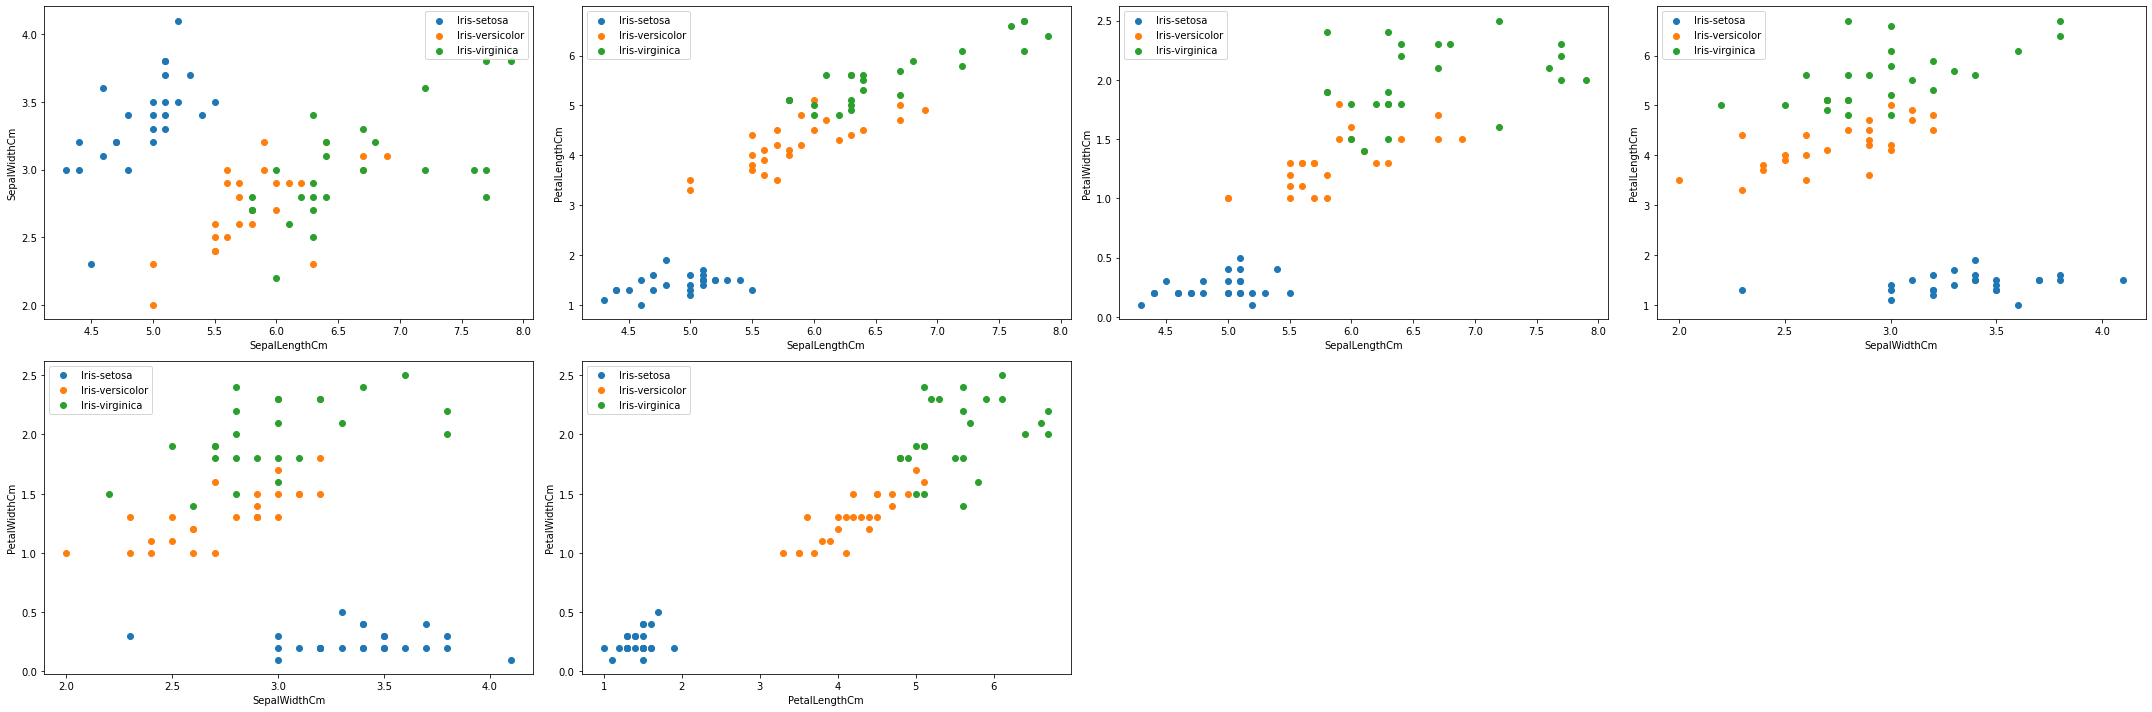

In [12]:
combs = combinations(np.array([0,1,2,3]))
iterations = np.size(combs, axis=0)
plt.figure(figsize=(30,10))
for j in range(iterations):
    ax = plt.subplot(2,4,j+1)
    tup = combs[j,:]#grab tupple of combinations in form (x,y) and I should have num = iterations of combinations
    scatterClass(ax, 'Species', tup[0], tup[1])
plt.tight_layout()
plt.show()

* Looking at every way we can graph the flowers using only 2 features, shows us that there is not perfect linear seperator if we only use 2 features. 
* There are some that are better than others however, the best combination being PetalLengthCm and PetalWidthCm.
* The worst combination is SepalLengthCm and SepalWidthCm, which we deduced just from looking at the means, min, and max from before. 
* Seeing as there is no way we can have a perfect linear seperable line seperating Iris-versicolor and Iris-virginica, let us see if 3 features will do the trick

# Line Fitting By Hand

Here, we practice our visualization skills by adding interactivity and lines to correspond to linear models.

* We will first use the features *PetalLengthCm* and *PetalWidthCm* , meaning our coefficient vector will look like: $w$ = $[w_0,w_1,w_2]$
* Since we are using/comparing different linear models, we know that the linear decision boundary, $z$ , will be a linear combination of $w$ and inputs, $x$ , and needs a bias, $w_0$ , so that gives us: 

$${z = w^Tx = }\sum_{n}w_ix_i = w_0 + w_1x_1 + w_2x_2 + ... w_ix_i$$
* The boundary will be where $z = w_0 + w_1x_1 + ... w_ix_i = 0$.
* Using algebra, in this scenario with only 2 features, $w_0 + w_1x_1 + w_2x_2 = 0 \rightarrow x_2 = -(\frac{w_1}{w_2}x_1 + \frac{w_0}{w_2})$
* The prediction rule **(For this example, does not apply to every supervised learning algorithm!!!!)** is simply:
$$\hat{y} = \left\{ \begin{array}{rc1}
    1 & \mbox{if} & {z} \geq {0} \\
    0 & \mbox{else} & {z < 0} \end{array}\right.$$
  Where 1 and 0 are different classes. This is also the **THRESHOLD FUNCTION!**
* Example:
  $$x = [1,  3]$$
  $$w = [2 ,1, -2 ]$$
  $$z = 2 + 1*1 + -2*3 = -3$$
  $$z = -3 < 0$$
  $$\hat{y} = 0$$
 Therefore, we predict the class is 0 for data point $x = [1, 3]$
* But we will first focus on fine tuning the weight coefficients, $w_1$ , $w_2$ , and $w_0$ by hand

We must first make a function that will be able to draw a line using these principles from the weight coefficients $w$.
However since we will be eventually coloring in regions, we will want to use contour instead of just making a regular line plot.

We first grab the graph in question:

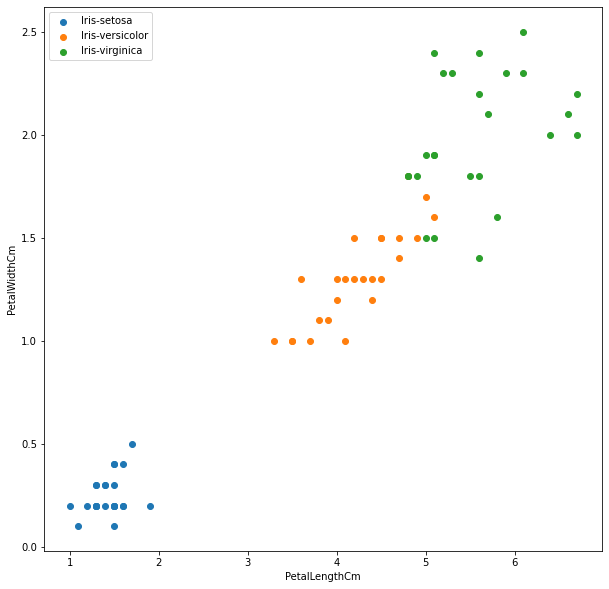

In [13]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
scatterClass(ax, 'Species', 2, 3)
plt.show()

Now we need to make a vector $w = [w_0, w_1, w_2]$ with bias $w_0$ that allows us to seperate *Iris-Setosa* from *Iris-versicolor*:

### **Creating an Line from interactive plot for contourf() and plot()**

contourf():

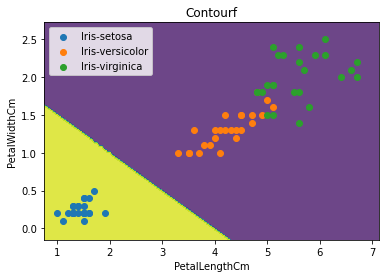

In [14]:
#Using countourf
#Lets first make a normal line y = x + 0 which means w0 = 0, w1 = 1, w2 = -1
w = np.array([0,1,-1])
delta = 0.025
def weightsContourf(w0,w1,w2):
    return contourfLine(np.array([w0,w1,w2]))
def contourfLine(w):
    x = np.arange(df['PetalLengthCm'].values.min() - 0.25, df['PetalLengthCm'].values.max() + 0.25,delta) #We are using PetalLengthCm
    y = np.arange(df['PetalWidthCm'].values.min() - 0.25,df['PetalWidthCm'].values.max() + 0.25,delta)
    x1,x2 = np.meshgrid(x,y)
    #Now I want to be able to make tuples to span through the entire graph from 0 to 3
    x_vector = np.array([x1.ravel(),x2.ravel()]).T #We have coordinates [x1,x2] = [0,0],[0,1],[0,2]...[3,3]
    Z = x_vector.dot(w[1:]) + w[0] #This is z = w0 + w1*x1 ... + wn*xn
    Z = Z.reshape(x1.shape)
    y_hat = np.where(Z >= 0, 1, -1) #This is where the prediction is made according to the value of Z
    fig, ax = plt.subplots()
    ax.contourf(x1, x2, y_hat, alpha = 0.8)
    scatterClass(ax,'Species',2,3)
    plt.title("Contourf")
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.show()
dis1 = interactive(weightsContourf, w0=widgets.FloatSlider(min=-3,max=3,step=0.1,value=2), w1=widgets.FloatSlider(min=-3,max=3,step=0.1,value=-0.5), w2=widgets.FloatSlider(min=-3,max=3,step=0.1,value=-1))
display(dis1)

* We see that if $w_0 = 2$ , $w_1 = -0.5$ , $w_2 = -1$, then we find a perfectly linear decision boundary splitting Iris-setosa and the other 2 classes.
* However there are infinitely many valid weight values for a linear decision boundary, this is just one example.

plot():

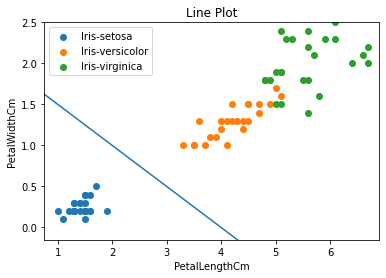

In [15]:
#Using line plot
def weightsLine(w0,w1,w2):
    return decisionLine(np.array([w0,w1,w2]))
def decisionLine(w):
    x = np.arange(df['PetalLengthCm'].values.min() - 0.25, df['PetalLengthCm'].values.max() + 0.25,delta)
    fig, ax = plt.subplots()
    if(w[2] == 0 and (w[0] == 0 or w[1] == 0)):
        ax.plot()
    else:
        y = -(w[1]/w[2])*x - (w[0]/w[2])
        ax.plot(x,y)
    plt.title("Line Plot")
    scatterClass(ax,'Species',2,3)
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.xlim(df['PetalLengthCm'].values.min() - 0.25, df['PetalLengthCm'].values.max())
    plt.ylim(df['PetalWidthCm'].values.min() - 0.25,df['PetalWidthCm'].values.max())
    plt.show()
    print()
disp2 = interactive(weightsLine, w0=widgets.FloatSlider(min=-3,max=3,step=0.1,value=2), w1=widgets.FloatSlider(min=-3,max=3,step=0.1,value=-0.5), w2=widgets.FloatSlider(min=-3,max=3,step=0.1,value=-1))
display(disp2)

* We can see the same applies if we just use a simple plot to graph the decision boundary

# Basic Perceptron Learning

* Now that we see how everything looks and understand how things are spread out, we can train a basic model to compare its accuracy using a Perceptron which we know will not be 100%.
* We know it would be perfect for seperating Iris-setsa from the other two with 100% however, so we will start with that since its easy to visualize binary classification.
* First we will train without standardization, so we need to see how the training is done from a Perceptron:
    1. Initialize the weights to zero or some small random number, and make sure the class labels are either -1 or 1 since the predictions will be as well
    2. For each training example, $i$ , we compute the prediction, $\hat{y}$ using the rule we stated above, then update weights based on:
    $$w_j = w_j + \Delta{w_j}$$ 
    $$\Delta{w_j} = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$$
    Where $\eta$ is the learning rate

In [16]:
#This is used to make sure we don't have Iris-virginica in our data to keep it an easy binary classification
#Note, y_test[2] didn't work because the index is not correct
X_train_novirg = X_train.copy()
y_train_novirg = y_train.copy()
counter = 0
for i in range(len(y_train)):
    if y_train[i] == 'Iris-virginica':
        X_train_novirg = np.delete(X_train_novirg,counter, axis=0)
        y_train_novirg = np.delete(y_train_novirg,counter)
        counter = counter - 1
    counter = counter + 1
X_train_novirg = X_train_novirg[:,[2,3]] #This will give us [PetalLengthCm,PetalWidthCm]
y_train_novirg = np.where(y_train_novirg == 'Iris-setosa',1,-1) #Turns class labels into 1 and -1

X_test_novirg = X_test.copy()
y_test_novirg = y_test.copy()
counter = 0
for i in range(len(y_test)):
    if y_test[i] == 'Iris-virginica':
        X_test_novirg = np.delete(X_test_novirg,counter,axis=0)
        y_test_novirg = np.delete(y_test_novirg,counter,axis=0)
        counter = counter - 1
    counter = counter + 1
X_test_novirg = X_test_novirg[:,[2,3]]
y_test_novirg = np.where(y_test_novirg == 'Iris-setosa',1,-1)

* **We can see that with only 10 epochs, it perfectly separates the two**

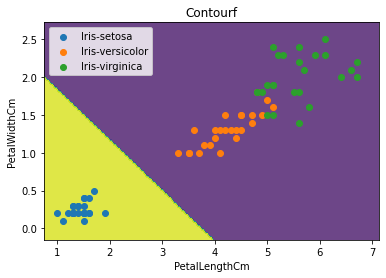

In [17]:
from sklearn.linear_model import Perceptron
ppt = Perceptron(penalty = None, alpha = 0.01, max_iter = 10, shuffle = True, eta0 = 1, random_state = 1) #tol is the stopping criteria, which is a parameter as well
ppt.fit(X_train_novirg,y_train_novirg)
weightsContourf(ppt.intercept_,ppt.coef_[0,0],ppt.coef_[0,1])

In [18]:
print("Score for training set: " + str(ppt.score(X_train_novirg,y_train_novirg)*100) + "%")
print("Score for test set: " + str(ppt.score(X_test_novirg,y_test_novirg)*100) + "%")
print("Weights:" ,ppt.coef_, "Intercept:", ppt.intercept_)

Score for training set: 100.0%
Score for test set: 100.0%
Weights: [[-0.8 -1.2]] Intercept: [3.]


* **Now we will try to focus on separating Iris-versicolor and Iris-virginica**.

We can see that the best possible line would only give us 2 wrong, which means it gets 48/50 right, so we have 96% accuracy as the best accuracy

In [19]:
X_train_noset = X_train[:,[2,3]].copy()
y_train_noset = y_train.copy()
X_test_noset = X_test[:,[2,3]].copy()
y_test_noset = y_test.copy()
counter = 0
for i in range(len(y_train)):
    if y_train[i] == 'Iris-setosa':
        X_train_noset = np.delete(X_train_noset,counter,axis=0)
        y_train_noset = np.delete(y_train_noset,counter)
        counter = counter - 1
    counter = counter + 1
y_train_noset = np.where(y_train_noset == 'Iris-versicolor', 1 ,-1)
counter = 0
for i in range(len(y_test)):
    if y_test[i] == 'Iris-setosa':
        X_test_noset = np.delete(X_test_noset,counter,axis=0)
        y_test_noset = np.delete(y_test_noset,counter)
        counter = counter - 1
    counter = counter + 1
y_test_noset = np.where(y_test_noset == 'Iris-versicolor', 1 ,-1)

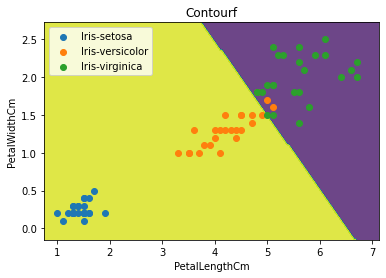

In [20]:
ppt2 = Perceptron(max_iter = 1000000, shuffle = True, random_state = 1, eta0 = 0.000001, tol = None) #Note, setting tol to None will allow it to go past 1e-3 which is very important
ppt2.fit(X_train_noset,y_train_noset)
weightsContourf(ppt2.intercept_,ppt2.coef_[0,0],ppt2.coef_[0,1])

In [21]:
print("Score for training set: ", str(ppt2.score(X_train_noset,y_train_noset)*100)+"%")
print("# of wrong classifications:" , str((1. - ppt2.score(X_train_noset,y_train_noset))*len(X_train_noset)))
print()
print("Score for testing set: ", str(ppt2.score(X_test_noset,y_test_noset)*100)+"%")
print("# of wrong classifications:" , str((1. - ppt2.score(X_test_noset,y_test_noset))*len(X_test_noset)))

Score for training set:  94.0%
# of wrong classifications: 3.0000000000000027

Score for testing set:  98.0%
# of wrong classifications: 1.0000000000000009


* We see that the best that we can do is only get 94% for training data, and 98% for testing data. But this doesn't match up with our own line which gives us 96% accuracy. After testing with parameters, I can't seem to make the perceptron reach 96%.
* Lets see if we can do better with more features.

### **3-D Graphing**

We can see that only using 2 features, we wouldn't be able to perfectly split versicolor and virginica. So we will up the count to 3 features/dimensions.
* We will the reuse the same 2 features, but we don't know what the third feature should be.

In [22]:
#First we will use SepalWidthCm
X_3d = df[['SepalWidthCm','PetalLengthCm','PetalWidthCm']].copy().values
y_3d = df['Species'].values
#Now delete Iris-setosa
X_vv = X_3d.copy()
y_vv = y_3d.copy()
counter = 0
for i in range(len(y)):
    if y[i] == 'Iris-setosa':
        X_vv = np.delete(X_vv,counter, axis = 0)
        y_vv = np.delete(y_vv,counter)
        counter = counter - 1
    counter = counter + 1
#split the training and testing data set
X_vv_train, X_vv_test, y_vv_train, y_vv_test = train_test_split(X_vv, y_vv, stratify = y_vv, test_size = 0.50, random_state = 1)

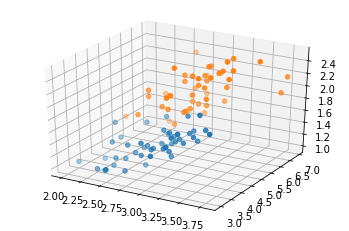

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(y_vv):
    index = np.array(y_vv[:] == i)
    ax.scatter(X_vv[index,0],X_vv[index,1],X_vv[index,2], label = i)
plt.show()

Lets train the Perceptron now

In [24]:
ppt3 = Perceptron(max_iter = 1000000, shuffle = True, random_state = 1, eta0 = 0.000001, tol = None)
ppt3.fit(X_vv_train, y_vv_train)
print("Score for training set: ", str(ppt3.score(X_vv_train,y_vv_train)*100)+"%")
print("# of wrong classifications:" , str((1. - ppt3.score(X_vv_train,y_vv_train))*len(X_vv_train)))
print()
print("Score for testing set: ", str(ppt3.score(X_vv_test,y_vv_test)*100)+"%")
print("# of wrong classifications:" , str((1. - ppt3.score(X_vv_test,y_vv_test))*len(X_vv_test)))

Score for training set:  98.0%
# of wrong classifications: 1.0000000000000009

Score for testing set:  96.0%
# of wrong classifications: 2.0000000000000018


* Using these parameters, we see that our training set is more accurate, even more that the percect boundary.
* But more importantly, we see that the testing set is less accurate than before. This means we need to mess with some parameters.

In [25]:
ppt3 = Perceptron(max_iter = 10000, shuffle = True, random_state = 1, eta0 = 0.00000001, tol = None)
ppt3.fit(X_vv_train,y_vv_train)
print("Training accuracy: ", str(ppt3.score(X_vv_train,y_vv_train)*100)+"%")
print("Testing accuracy: ", str(ppt3.score(X_vv_test,y_vv_test)*100)+"%")

Training accuracy:  94.0%
Testing accuracy:  98.0%


* Even trying to fine tune the agent by messing with max_iter and eta0 didn't do anything significant.

### **Using all features**

In [26]:
X_all = df.iloc[:,[0,1,2,3]].values
y_all = df.iloc[:,-1].values
y_all = np.reshape(y_all,(-1,1))
#Now delete Iris-setosa
X_all_vv = X_all.copy()
y_all_vv = y_all.copy()
counter = 0
for i in range(len(y_all)):
    if y_all[i] == 'Iris-setosa':
        X_all_vv = np.delete(X_all_vv,counter, axis = 0)
        y_all_vv = np.delete(y_all_vv,counter)
        counter = counter - 1
    counter = counter + 1
#split the training and testing data set
X_all_vv_train, X_all_vv_test, y_all_vv_train, y_all_vv_test = train_test_split(X_all_vv, y_all_vv, stratify = y_vv, test_size = 0.50, random_state = 1)

In [27]:
ppt4 = Perceptron(max_iter = 1000, eta0 = 0.001, shuffle = True, random_state = 1, tol = None)
ppt4.fit(X_all_vv_train, y_all_vv_train)
print("Training accuracy: ", str(ppt4.score(X_all_vv_train,y_all_vv_train)*100)+"%")
print("Testing accuracy: ", str(ppt4.score(X_all_vv_test,y_all_vv_test)*100)+"%")

Training accuracy:  100.0%
Testing accuracy:  96.0%


We can see that with this, our accuracy can finally hit 100% on training data, but testing data is still not as accurate as with only using 2 features.

In [28]:
ppt4 = Perceptron(max_iter = 3000000, eta0 = 0.000001, shuffle = True, random_state = 1, tol = None)
ppt4.fit(X_all_vv_train, y_all_vv_train)
print("Training accuracy: ", str(ppt4.score(X_all_vv_train,y_all_vv_train)*100)+"%")
print("Testing accuracy: ", str(ppt4.score(X_all_vv_test,y_all_vv_test)*100)+"%")

Training accuracy:  100.0%
Testing accuracy:  96.0%


And after quick parameter testing, we can see no difference is being made.

### What these different models tell us, is that we overfitted because of how with only 2 features we still managed to get 98% compared to 96% when using 4 features.